# Agora que já aprendemos a trabalhar com leitura, tratamento simples e visualização de dados, podemos dar prosseguimento aos nossos estudos, introduzindo algumas técnicas de pré processamento e já aplicando nosso primeiro algoritmo de aprendizado de máquina!

In [1]:
#Bibliotecas utilizadas
import pandas as pd

<h3> Explorando a base de dados que vamos trabalhar hoje: <br> 

https://github.com/Natalnet/GCiD/raw/master/Codes/Data/INMET-Dados_Diarios_PortoAlegre_1980-2017.csv

In [2]:
#Leitura dos dados
dataSet = pd.read_csv("https://github.com/Natalnet/GCiD/raw/master/Codes/Data/INMET-Dados_Diarios_PortoAlegre_1980-2017.csv",
                     skiprows = 16, sep = ";")

In [3]:
#Visualizando cabeçalho
dataSet.head()

,Estacao,Data,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 11
0,83967,01/01/1980,0,NaN,23.0,NaN,9.8,5.5,18.34,65.0,3.800000,NaN
1,83967,01/01/1980,1200,0.0,NaN,14.8,NaN,NaN,NaN,NaN,NaN,NaN
2,83967,02/01/1980,0,NaN,24.1,NaN,10.8,4.8,18.90,69.5,2.200000,NaN
3,83967,02/01/1980,1200,0.0,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN
4,83967,03/01/1980,0,NaN,28.4,NaN,11.7,5.0,21.24,59.0,2.166667,NaN


In [4]:
#Transformando data em variável do tipo datetime
dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")

In [5]:
#Atribuindo "Data" como índice para a base de dados
dataSet = dataSet.set_index("Data")

In [6]:
#Eliminando colunas "Unnamed" e "Estacao"
dataSet = dataSet.drop(columns = ["Unnamed: 11","Estacao"])

In [7]:
#Descrevendo base de dados
dataSet.describe()

,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,24542.000000,12266.000000,12242.000000,12243.000000,12131.000000,11600.000000,12227.000000,12223.000000,12269.000000
mean,600.000000,3.959351,25.398268,15.728727,5.888220,2.432095,19.738193,76.451771,2.071611
std,600.012224,10.226288,5.637669,4.861767,3.946654,1.541723,4.861474,10.047764,1.293506
min,0.000000,0.000000,8.600000,-0.200000,0.000000,0.000000,5.160000,37.500000,0.000000
25%,0.000000,0.000000,21.300000,12.500000,2.100000,1.300000,16.280000,69.500000,1.200000
50%,600.000000,0.000000,25.800000,16.300000,6.700000,2.200000,20.220000,76.500000,1.866667
75%,1200.000000,1.800000,29.600000,19.600000,9.100000,3.200000,23.560000,83.750000,2.700000
max,1200.000000,149.600000,40.600000,27.900000,13.200000,20.700000,33.700000,99.250000,14.500000


In [8]:
#Verificando dados
dataSet.head()

,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,,,,
1980-01-01,0,NaN,23.0,NaN,9.8,5.5,18.34,65.0,3.800000
1980-01-01,1200,0.0,NaN,14.8,NaN,NaN,NaN,NaN,NaN
1980-01-02,0,NaN,24.1,NaN,10.8,4.8,18.90,69.5,2.200000
1980-01-02,1200,0.0,NaN,13.8,NaN,NaN,NaN,NaN,NaN
1980-01-03,0,NaN,28.4,NaN,11.7,5.0,21.24,59.0,2.166667


# Algumas variáveis só são registradas às 12:00, outras apenas às 00:00. Vamos confirmar?

In [9]:
#Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]

In [10]:
#Verificando dataframe para os dados disponibilizados às 00:00 h
dataSet00.describe()

,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,12271.0,0.0,12242.000000,0.0,12131.000000,11600.000000,12227.000000,12223.000000,12269.000000
mean,0.0,NaN,25.398268,NaN,5.888220,2.432095,19.738193,76.451771,2.071611
std,0.0,NaN,5.637669,NaN,3.946654,1.541723,4.861474,10.047764,1.293506
min,0.0,NaN,8.600000,NaN,0.000000,0.000000,5.160000,37.500000,0.000000
25%,0.0,NaN,21.300000,NaN,2.100000,1.300000,16.280000,69.500000,1.200000
50%,0.0,NaN,25.800000,NaN,6.700000,2.200000,20.220000,76.500000,1.866667
75%,0.0,NaN,29.600000,NaN,9.100000,3.200000,23.560000,83.750000,2.700000
max,0.0,NaN,40.600000,NaN,13.200000,20.700000,33.700000,99.250000,14.500000


In [11]:
#Verificando dataframe para os dados disponibilizados às 12:00 h
dataSet12.describe()

,Hora,Precipitacao,TempMaxima,TempMinima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
count,12271.0,12266.000000,0.0,12243.000000,0.0,0.0,0.0,0.0,0.0
mean,1200.0,3.959351,NaN,15.728727,NaN,NaN,NaN,NaN,NaN
std,0.0,10.226288,NaN,4.861767,NaN,NaN,NaN,NaN,NaN
min,1200.0,0.000000,NaN,-0.200000,NaN,NaN,NaN,NaN,NaN
25%,1200.0,0.000000,NaN,12.500000,NaN,NaN,NaN,NaN,NaN
50%,1200.0,0.000000,NaN,16.300000,NaN,NaN,NaN,NaN,NaN
75%,1200.0,1.800000,NaN,19.600000,NaN,NaN,NaN,NaN,NaN
max,1200.0,149.600000,NaN,27.900000,NaN,NaN,NaN,NaN,NaN


In [12]:
#Descartando as colunas inválidas de cada DataFrame
dataSet00 = dataSet00.drop(columns = ["Hora","Precipitacao","TempMinima"])
dataSet12 = dataSet12.drop(columns = ["Hora","TempMaxima","Insolacao","Evaporacao Piche","Temp Comp Media","Umidade Relativa Media","Velocidade do Vento Media"])

In [13]:
#Visualizando dados
dataSet00.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media
Data,,,,,,
1980-01-01,23.0,9.8,5.5,18.34,65.00,3.800000
1980-01-02,24.1,10.8,4.8,18.90,69.50,2.200000
1980-01-03,28.4,11.7,5.0,21.24,59.00,2.166667
1980-01-04,28.0,11.1,7.7,22.22,63.75,3.333333
1980-01-05,28.9,11.3,10.3,23.34,69.00,3.766667


In [14]:
#Visualizando dados
dataSet12.head()

,Precipitacao,TempMinima
Data,,
1980-01-01,0.0,14.8
1980-01-02,0.0,13.8
1980-01-03,0.0,14.5
1980-01-04,0.0,15.9
1980-01-05,0.0,19.5


In [15]:
#Criando o intervalo completo de tempo de 01-01-1980 à 31-12-2017
dataInicial = '1980-01-01'
dataFinal = '2017-12-31'
tempo = pd.date_range(dataInicial, dataFinal)

In [16]:
#Atribuindo este intervalo de tempo à um dataSet provisório
dataSetProv = pd.DataFrame()
dataSetProv["Data"] = tempo

In [17]:
#Visualizando o dataSet provisório
dataSetProv.head()

,Data
0,1980-01-01
1,1980-01-02
2,1980-01-03
3,1980-01-04
4,1980-01-05


In [18]:
#Atribuindo o índice para o dataSet provisório como sendo a coluna de datas
dataSetProv = dataSetProv.set_index("Data")

In [19]:
#Mesclando o dataSet provisório como sendo o resultado da junção dos dataSet00 e dataSet12
dataSetProv = dataSetProv.join(dataSet00).join(dataSet12)

In [20]:
#Mostrando o resultado da junção
dataSetProv.head()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
Data,,,,,,,,
1980-01-01,23.0,9.8,5.5,18.34,65.00,3.800000,0.0,14.8
1980-01-02,24.1,10.8,4.8,18.90,69.50,2.200000,0.0,13.8
1980-01-03,28.4,11.7,5.0,21.24,59.00,2.166667,0.0,14.5
1980-01-04,28.0,11.1,7.7,22.22,63.75,3.333333,0.0,15.9
1980-01-05,28.9,11.3,10.3,23.34,69.00,3.766667,0.0,19.5


In [21]:
#Atribuindo ao dataSet original o dataSet provisório
dataSet = dataSetProv

In [22]:
#Eliminando dados inválidos
dataSet = dataSet.dropna()

In [23]:
#Descrevendo dados
dataSet.describe()

,TempMaxima,Insolacao,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Precipitacao,TempMinima
count,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000,11563.000000
mean,25.415160,5.904376,2.429958,19.747934,76.412025,2.091013,3.943838,15.717495
std,5.640662,3.949802,1.539877,4.869706,10.019447,1.298931,10.180307,4.874658
min,8.600000,0.000000,0.000000,5.160000,37.500000,0.000000,0.000000,-0.200000
25%,21.300000,2.100000,1.300000,16.280000,69.250000,1.200000,0.000000,12.500000
50%,25.800000,6.700000,2.200000,20.240000,76.500000,1.866667,0.000000,16.300000
75%,29.600000,9.100000,3.200000,23.580000,83.750000,2.733333,1.800000,19.600000
max,40.600000,13.200000,20.700000,33.700000,99.250000,14.500000,149.600000,27.900000


# Agora iremos falar de técnicas para pré-processamento

In [24]:
import matplotlib.pyplot as plt

/home/gilvandro/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


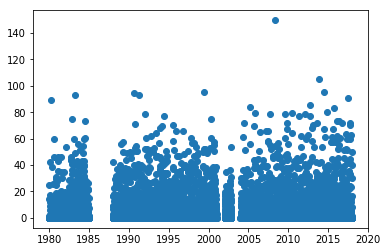

In [25]:
#Plotando gráfico de precipitação de chuva x tempo
plt.scatter(dataSet.index, dataSet["Precipitacao"])

<h3> A documentação para técnicas de pré-processamento da biblioteca Scikit-learn é bem vasta. Iremos tratar só de algumas. Segue o link:
    
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
# Transformação do tipo z = (x - u) / s
sc = StandardScaler()
xLabel = dataSet.index
yLabel = dataSet["Precipitacao"].values
yLabel = sc.fit_transform(yLabel.reshape(-1, 1))

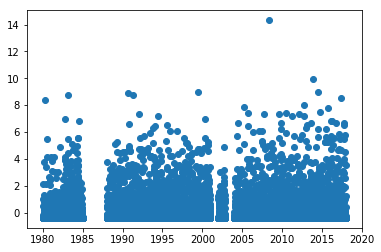

In [27]:
#Plotando gráfico
plt.scatter(xLabel, yLabel)

In [28]:
#Verificando dimensão do xLabel sem fazer o reshape
print(dataSet["Precipitacao"].values.shape)

(11563,)


In [29]:
#Verificando dimensão do xLabel após fazer o reshape
print(dataSet["Precipitacao"].values.reshape(-1, 1).shape)

(11563, 1)


In [30]:
from sklearn.preprocessing import MinMaxScaler
#Transformação entre o mínimo e o máximo (por padrão: máximo = 1.0, mínimo = 0.0)
mms = MinMaxScaler()
xLabel = dataSet.index
yLabel = dataSet["Precipitacao"].values
yLabel = mms.fit_transform(yLabel.reshape(-1, 1))

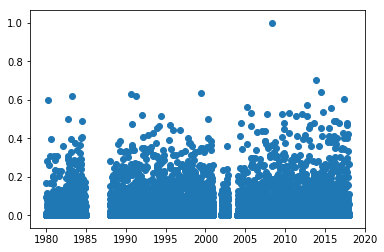

In [31]:
#Plotando gráfico
plt.scatter(xLabel, yLabel)

In [32]:
#Transformando agora entre -1.0 e 1.0
mms = MinMaxScaler(feature_range=(-1,1))
xLabel = dataSet.index
yLabel = dataSet["Precipitacao"].values
yLabel = mms.fit_transform(yLabel.reshape(-1, 1))

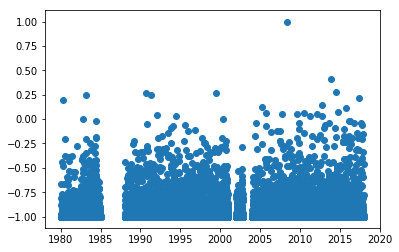

In [33]:
#Plotando gráfico
plt.scatter(xLabel, yLabel)

In [34]:
from sklearn.preprocessing import RobustScaler
#Transformação levando em conta os quartis (por padrão, 0.25 e 0.75), mais robusta à outliers
rs = RobustScaler()
xLabel = dataSet.index
yLabel = dataSet["Precipitacao"].values
yLabel = rs.fit_transform(yLabel.reshape(-1, 1))

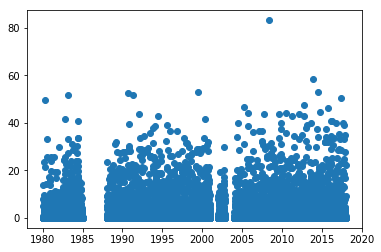

In [35]:
#Plotando gráfico
plt.scatter(xLabel, yLabel)

<h3> Seguem mais exemplos: 
    
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

# Agora vamos começar a falar de aprendizado de máquina!

In [36]:
#Separando variáveis que vamos utilizar para efetuar a regressão linear
X = dataSet["TempMaxima"]
Y = dataSet["TempMinima"]

In [37]:
from sklearn.model_selection import train_test_split
#Separando conjuntos de treino e de teste - mas o que são variáveis para treino e teste?
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 3)

# Descrevendo conjunto para treino

In [38]:
X_train.describe()

count    10406.000000
mean        25.431145
std          5.631862
min          8.600000
25%         21.300000
50%         25.900000
75%         29.600000
max         40.600000
Name: TempMaxima, dtype: float64

In [39]:
X_train.head()

Data
2000-11-23    35.8
2016-11-08    31.1
1992-05-16    20.8
2000-01-29    32.3
2007-10-26    31.8
Name: TempMaxima, dtype: float64

In [40]:
Y_train.describe()

count    10406.000000
mean        15.714847
std          4.871345
min         -0.200000
25%         12.500000
50%         16.300000
75%         19.600000
max         27.900000
Name: TempMinima, dtype: float64

In [41]:
Y_train.head()

Data
2000-11-23    18.5
2016-11-08    18.1
1992-05-16    15.6
2000-01-29    18.6
2007-10-26    21.6
Name: TempMinima, dtype: float64

# Descrevendo conjunto para teste

In [42]:
X_test.describe()

count    1157.000000
mean       25.271392
std         5.719658
min         9.100000
25%        21.200000
50%        25.500000
75%        29.600000
max        39.000000
Name: TempMaxima, dtype: float64

In [43]:
X_test.head()

Data
1999-08-29    20.8
1998-03-21    26.6
1988-07-11    13.1
1989-08-29    24.7
1994-12-12    39.0
Name: TempMaxima, dtype: float64

In [44]:
Y_test.describe()

count    1157.000000
mean       15.741314
std         4.906406
min         1.400000
25%        12.800000
50%        16.200000
75%        19.600000
max        26.100000
Name: TempMinima, dtype: float64

In [45]:
Y_test.head()

Data
1999-08-29    14.6
1998-03-21    17.6
1988-07-11     2.0
1989-08-29     5.2
1994-12-12    22.8
Name: TempMinima, dtype: float64

# Tantas linhas de pré-processamento, mas ... cadê o processamento?

In [46]:
from sklearn import linear_model
#Criando (e treinando) modelo para regressão linear
model = linear_model.LinearRegression()
model.fit(X_train.values.reshape(-1, 1), Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
#Usando modelo treinado com o conjunto de treino para prever os valores esperados para o conjunto de teste
resultados = model.predict(X_test.values.reshape(-1, 1))

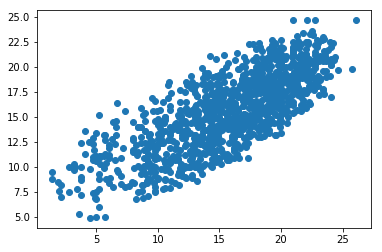

In [48]:
#Plotando gráfico de valores previstos x valores esperados
plt.scatter(Y_test, resultados)

# Agora vamos fazer uma avaliação mais do que apenas visual

In [49]:
#Algumas métricas para avaliação
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [50]:
#Erro médio absoluto
print(mean_absolute_error(Y_test, resultados))

2.5625751734046998


In [51]:
#Erro médio quadrático
print(mean_squared_error(Y_test, resultados))

9.87680665181563


In [52]:
#Coeficiente de correlação de Pearson
np.corrcoef(Y_test, resultados)

array([[1.        , 0.76816745],
       [0.76816745, 1.        ]])